# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and load DataFrames called `electricity`, `dowjones` and `white`

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
plt.style.use('dark_background')


from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://vcu-scma-440.s3.amazonaws.com/data/aus_electricity.csv > aus_electricity.csv
!curl https://vcu-scma-440.s3.amazonaws.com/data/dowjones.csv > dowjones.csv

dowjones = pd.read_csv('dowjones.csv', parse_dates=['date']).set_index('date')
elec = pd.read_csv('aus_electricity.csv', parse_dates=['date']).set_index('date')

import numpy as np
np.random.seed = 42

white = pd.DataFrame(index=elec.index)
white['white'] = np.random.randn(white.shape[0]) + 23

random_walk = pd.DataFrame(index=elec.index)

val = 23
rw = [val]
for i in range(random_walk.shape[0]-1):
    val += np.random.randn(1)[0]
    rw.append(val)
    
random_walk['walk'] = rw

elec = elec.tail(100)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7777  100  7777    0     0  71348      0 --:--:-- --:--:-- --:--:-- 71348
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5270  100  5270    0     0  57912      0 --:--:-- --:--:-- --:--:-- 57912


# Exploring the Data

First, let's take a look at our data sets. We first can plot the `white` and `random_walk`, which are our theoretical points of comparison. 

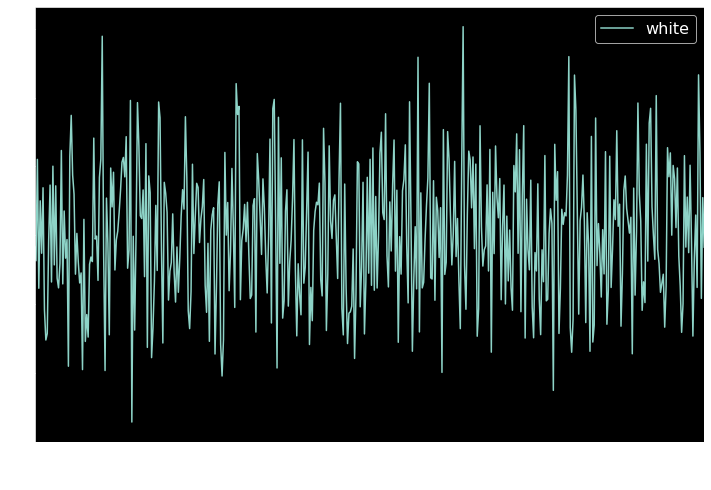

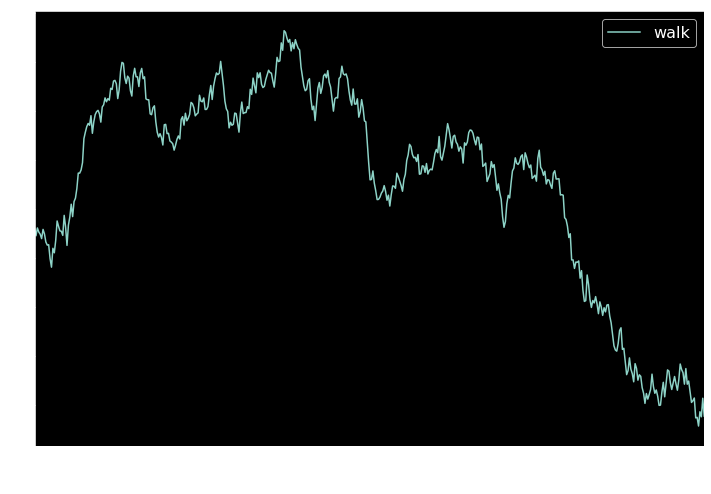

In [33]:
display(white.plot())
display(random_walk.plot())

We can then take a look at the two real time series that we'll work with, `elec` which is monthly electricity production in Australia, and `dowjones` which is the daily DJI for just under one year. 

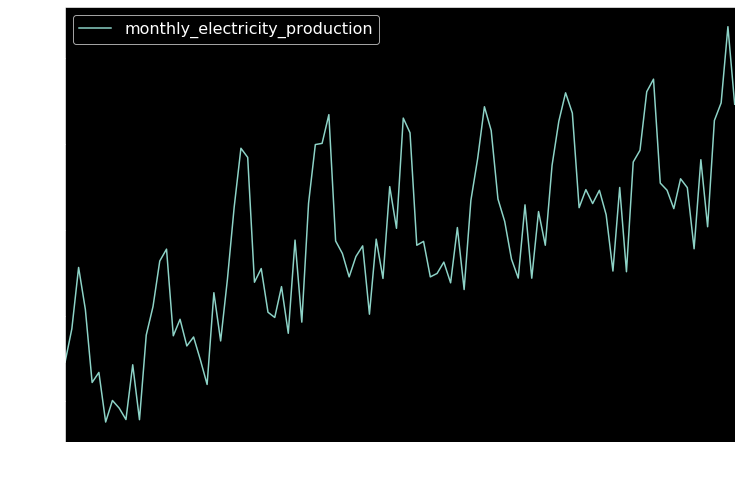

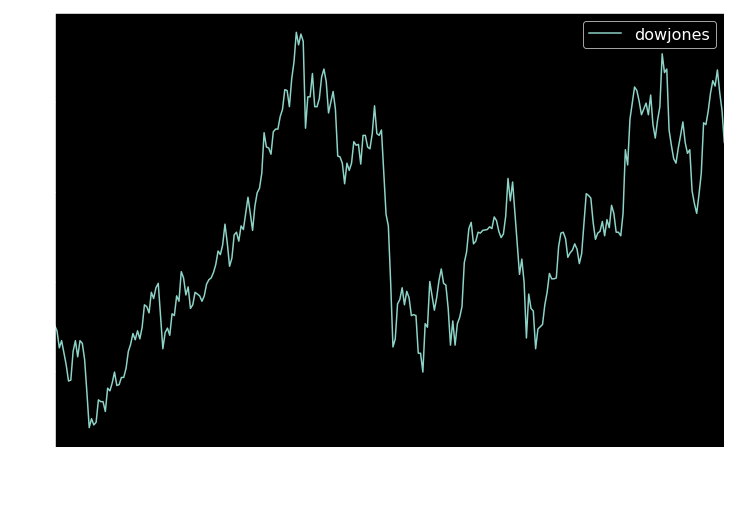

In [34]:
display(elec.plot())
display(dowjones.plot())

# Examining Autocorrelations
Let's begin by analyzing the above series for autocorrelations. We'll do so by:

* Computing the ACF and PACF
* Portmandeau Tests

To plot the ACF and PACF, we can use the functions `plot_acf` and `plot_pacf` from `statsmodels.graphics.tsaplots`. To import, we call:

```
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
```

In [36]:
acf = plot_acf?

In [ ]:
acf = plot_acf